# Optimization without feature engineering
Another optimization attempt was made, this time not including the MAP variable feature engineering

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import shapiro
import seaborn as sns

In [2]:
file_path = Path('../Resources/Heart_Disease.csv')
df = pd.read_csv(file_path)
df.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,male,39,4,no,0,0,0,0,no,195,106.0,70.0,26.97,80,77,no
1,female,46,2,no,0,0,0,0,no,250,121.0,81.0,28.73,95,76,no
2,male,48,1,yes,20,0,0,0,no,245,127.5,80.0,25.34,75,70,no
3,female,61,3,yes,30,0,0,1,no,225,150.0,95.0,28.58,65,103,yes
4,female,46,3,yes,23,0,0,0,no,285,130.0,84.0,23.10,85,85,no


In [3]:
# Mapping yes/no and female/male columns to binary numeric
df['CHDRisk'] = df['CHDRisk'].map({'yes': 1, 'no': 0})
df['diabetes'] = df['diabetes'].map({'yes': 1, 'no': 0})
df['smokingStatus'] = df['smokingStatus'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

df.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,1.0,39,4,0.0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0.0,46,2,0.0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1.0,48,1,1.0,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0.0,61,3,1.0,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0.0,46,3,1.0,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [4]:
# Checking nulls
null_values = df.isnull().sum()
null_values

sex                11
age                 0
education           0
smokingStatus      13
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
CHDRisk             0
dtype: int64

In [5]:
print(f'The number of rows before dropping null values is {df.shape[0]}')

The number of rows before dropping null values is 3674


In [6]:
df_cleaned = df.dropna()

In [7]:
print(f'The number of rows after dropping null values is {df_cleaned.shape[0]}')

The number of rows after dropping null values is 3652


In [8]:
# Investigating if there's duplicate rows in the data set
df_cleaned.duplicated().sum().sum()
df_cleaned[df_cleaned.duplicated()]

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
3658,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3659,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3660,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3661,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3662,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3663,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3664,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3665,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3666,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3667,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1


In [9]:
# Dropping the duplicate rows 
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.duplicated().sum()

C:\Users\emily\AppData\Local\Temp\ipykernel_31948\1688593351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop_duplicates(inplace=True)


0

In [14]:
# Separating target variables and features
y = df_cleaned['CHDRisk']
X = df_cleaned.drop(columns='CHDRisk')

In [16]:
from sklearn.model_selection import train_test_split
# Splitting the data into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [17]:
from imblearn.over_sampling import SMOTE
# Using synthetic minority over-sampling technique to balance the target variable conditions in the training data
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [18]:
# Importing dependencies
import pandas as pd
from pathlib import Path
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


In [19]:
# Scaling the feature variables
scaler = StandardScaler()
X_scaler = scaler.fit(X_train_resampled)

X_train_scaled = X_scaler.transform(X_train_resampled)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# Instantiating the model
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [21]:
# Training the model
rf_model = rf_model.fit(X_train_scaled, y_train_resampled)

In [22]:
# Making predictions with the testing data
test_predictions = rf_model.predict(X_test_scaled)

In [23]:
# Creating the confusion matrix
cm = confusion_matrix(y_test, test_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, test_predictions)

In [24]:
# Creating the confusion matrix
cm = confusion_matrix(y_test, test_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy and recall scores
acc_score = accuracy_score(y_test, test_predictions)

In [25]:
# Printing the results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, test_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,711,61
Actual 1,101,37


Accuracy Score : 0.8219780219780219
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       772
           1       0.38      0.27      0.31       138

    accuracy                           0.82       910
   macro avg       0.63      0.59      0.61       910
weighted avg       0.80      0.82      0.81       910



In [26]:
# Calculating feature importances and listing by importance
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.14105122326665778, 'age'),
 (0.12971577569304768, 'sex'),
 (0.12200035151183507, 'sysBP'),
 (0.09528298055101991, 'totChol'),
 (0.09367006268461893, 'diaBP'),
 (0.08783559469952179, 'BMI'),
 (0.08650599579820514, 'glucose'),
 (0.07999153298155742, 'heartRate'),
 (0.04864011272884511, 'cigsPerDay'),
 (0.0486358706947914, 'smokingStatus'),
 (0.045584849450940886, 'education'),
 (0.013405909584432493, 'prevalentHyp'),
 (0.003928148550358815, 'diabetes'),
 (0.0028261152399030576, 'BPMeds'),
 (0.0009254765642644774, 'prevalentStroke')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

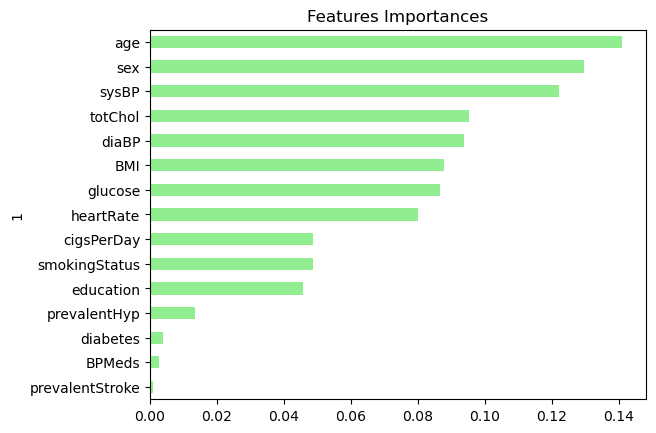

In [27]:
# Visualizing the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)